# MMC Laboratorium 4

Autor: Jakub Ostrzołek

## Zadanie 5

$$I = \int_0^{\pi/2} \sin x \: dx = 1$$

### Definicja eksperymentu Monte Carlo w wariancie podstawowym

In [10]:
import numpy as np
from typing import Callable


def monte_carlo_integrate(f: Callable[[float], float], x_lim: tuple[float, float], n_points: int) -> float:
    gen = np.random.default_rng()

    domain_width = x_lim[1] - x_lim[0]
    xs: np.ndarray = gen.random(size=n_points) * domain_width + x_lim[0]
    ys: np.ndarray = np.apply_along_axis(f, 0, xs)
    estimate = ys.mean() * domain_width

    ys_squared: np.ndarray = np.power(ys, 2)
    std_dev = np.sqrt(1 / (n_points - 1) * (ys_squared.mean() - ys.mean() ** 2))
    return (estimate, std_dev)

### Przeprowadzenie szacowania dla różnych liczności próbek

In [11]:
ns = np.logspace(2, 6, 40).astype(int)

result = np.array([monte_carlo_integrate(np.sin, (0, np.pi/2), n) for n in ns])

ys_estimate = result[:, 0].flatten()
std_devs = result[:, 1].flatten()
errors = np.abs(ys_estimate - 1)
display(np.stack([ns, ys_estimate, std_devs, errors], axis=1))

array([[1.00000000e+02, 1.02898590e+00, 2.88520019e-02, 2.89859013e-02],
       [1.26000000e+02, 1.00696350e+00, 2.51950524e-02, 6.96349679e-03],
       [1.60000000e+02, 1.02910443e+00, 2.40229623e-02, 2.91044347e-02],
       [2.03000000e+02, 1.01980573e+00, 2.15949487e-02, 1.98057331e-02],
       [2.57000000e+02, 1.00902929e+00, 1.80996574e-02, 9.02928947e-03],
       [3.25000000e+02, 1.01623979e+00, 1.68956858e-02, 1.62397890e-02],
       [4.12000000e+02, 1.01380573e+00, 1.52407861e-02, 1.38057318e-02],
       [5.22000000e+02, 1.00226858e+00, 1.33835123e-02, 2.26858201e-03],
       [6.61000000e+02, 1.01147363e+00, 1.23195956e-02, 1.14736325e-02],
       [8.37000000e+02, 9.83920326e-01, 1.05329743e-02, 1.60796745e-02],
       [1.06000000e+03, 1.01222700e+00, 9.47996715e-03, 1.22270023e-02],
       [1.34300000e+03, 1.00515715e+00, 8.35166623e-03, 5.15715494e-03],
       [1.70100000e+03, 9.92521106e-01, 7.45967969e-03, 7.47889371e-03],
       [2.15400000e+03, 1.00068928e+00, 6.54818418e

### Definicja eksperymentu Monte Carlo z próbkowaniem ważonym

In [12]:
import numpy as np
from typing import Callable, Generator, Any, NoReturn
from itertools import islice


def random_from_distribution_elimination(
    distribution: Callable[[float], float], x_lim: tuple[float, float], y_max: float
) -> Generator[float, Any, NoReturn]:
    gen = np.random.default_rng()
    lim = np.array([x_lim, (0, y_max)])
    scale = lim[:, 1] - lim[:, 0]
    translation = lim[:, 0]
    while True:
        [x, y] = gen.random(2) * scale + translation
        if y <= distribution(x):
            yield x


def monte_carlo_integrate_importance_sampling(
    f: Callable[[float], float],
    distribution: Callable[[float], float],
    distribution_max: float,
    x_lim: tuple[float, float],
    n_points: int,
) -> float:
    gen = random_from_distribution_elimination(distribution, x_lim, distribution_max)
    xs = np.array([x for x in islice(gen, n_points)])

    ps: np.ndarray = np.apply_along_axis(distribution, 0, xs)
    ys: np.ndarray = np.apply_along_axis(f, 0, xs)
    estimate = (ys/ps).mean()

    ys_squared: np.ndarray = np.power(ys/ps, 2)
    std_dev = np.sqrt(1 / (n_points - 1) * (ys_squared.mean() - estimate ** 2))
    return (estimate, std_dev)

### Przeprowadzenie szacowania dla różnych liczności próbek

In [13]:
def g(x: float) -> float:
    return 8 * x / np.power(np.pi, 2)


result_is = np.array(
    [
        monte_carlo_integrate_importance_sampling(
            f=np.sin,
            distribution=g,
            distribution_max=g(np.pi / 2),
            x_lim=(0, np.pi / 2),
            n_points=n,
        )
        for n in ns
    ]
)

ys_estimate_is = result_is[:, 0].flatten()
std_devs_is = result_is[:, 1].flatten()
errors_is = np.abs(ys_estimate_is - 1)
display(np.stack([ns, ys_estimate_is, std_devs_is, errors_is], axis=1))

array([[1.00000000e+02, 9.94657757e-01, 1.23726249e-02, 5.34224324e-03],
       [1.26000000e+02, 1.00723145e+00, 1.18734719e-02, 7.23145071e-03],
       [1.60000000e+02, 1.01246634e+00, 1.06123982e-02, 1.24663370e-02],
       [2.03000000e+02, 9.99357646e-01, 9.34723915e-03, 6.42354117e-04],
       [2.57000000e+02, 1.00270412e+00, 8.25056119e-03, 2.70412485e-03],
       [3.25000000e+02, 1.00430155e+00, 7.12563968e-03, 4.30154733e-03],
       [4.12000000e+02, 9.95282241e-01, 6.48552331e-03, 4.71775911e-03],
       [5.22000000e+02, 1.00330308e+00, 5.73910300e-03, 3.30308396e-03],
       [6.61000000e+02, 1.00832293e+00, 4.90249502e-03, 8.32293027e-03],
       [8.37000000e+02, 1.00340246e+00, 4.48635651e-03, 3.40245797e-03],
       [1.06000000e+03, 9.99702900e-01, 3.99184672e-03, 2.97100476e-04],
       [1.34300000e+03, 1.00026057e+00, 3.55701977e-03, 2.60573007e-04],
       [1.70100000e+03, 1.00275997e+00, 3.13197937e-03, 2.75997490e-03],
       [2.15400000e+03, 9.96333803e-01, 2.79041382e

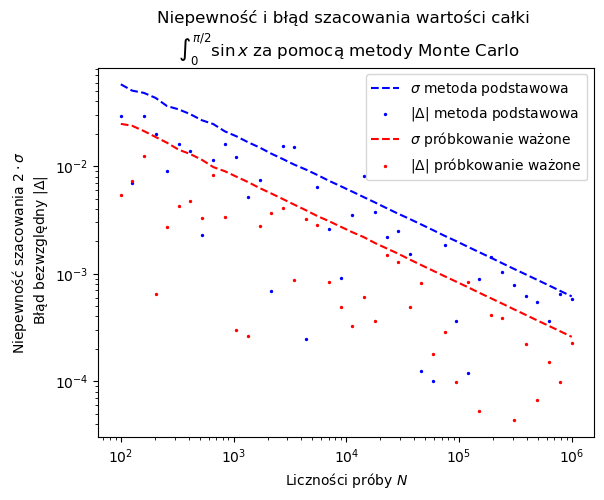

In [14]:
from matplotlib import pyplot as plt

plt.title("Niepewność i błąd szacowania wartości całki \n $\int_0^{\pi/2} \sin x$ za pomocą metody Monte Carlo")
plt.plot(ns, 2 * std_devs, "b--", label="$\sigma$ metoda podstawowa")
plt.scatter(ns, errors, 2, "b", label="$|\Delta|$ metoda podstawowa")
plt.plot(ns, 2 * std_devs_is, "r--", label="$\sigma$ próbkowanie ważone")
plt.scatter(ns, errors_is, 2, "r", label="$|\Delta|$ próbkowanie ważone")
plt.xlabel("Liczności próby $N$")
plt.xscale("log")
plt.ylabel("Niepewność szacowania $2 \cdot \sigma$ \n Błąd bezwzględny $|\Delta|$")
plt.yscale("log")
plt.legend(loc="best")
plt.show()

Zarówno dla metody podstawowej, jak i z próbkowaniem ważonym widać, że:

* niepewność szacowania maleje liniowo, ze współczynnikiem liniowym ok. $-1/2$ (w skali logarytmicznej),
* znaczna większość błędów szacowania znajduje się poniżej niepewności szacowania,
* niektóre błędy szacowania znajdują się powyżej niepewności szacowania.

Niepewność szacowania jest to tak na prawdę $\sim 95$ percentyl w rozkładzie błędu szacowania (prawo dwóch sigm w rozkładzie normalnym), a zatem ostatnie dwie obserwacje są zgodne z oczekiwaniami.

Ponadto widać, że metoda z próbkowaniem ważonym dla takiej samej liczności próbek posiada mniejszą niepewność szacowania (o ok. $0.5$ dekady). Wynika to z faktu, że częściej generujemy punkty mające większy udział w szacowaniu wartości estymowanej statystyki. Mniejsza niepewność jest jednak okupiona dłuższym czasem obliczeń, ze względu na dodatkowy koszt generowania liczby losowej z rozkładu innego niż rozkład równomierny. Prawdopodobnie przy lepszej (szybszej) implmentacji efekt byłby mniej zauważalny.

## Zadanie 7



$$I = \int_{0}^{\pi} \sin x \,\mathrm{d}x = 2$$

### Definicja eksperymentu Monte Carlo w wariancie orzeł-reszka

In [15]:
import numpy as np


def monte_carlo_integrate_coin_flip(
    f: Callable[[float], float],
    x_lim: tuple[float, float],
    y_lim: tuple[float, float],
    n_points: int,
    generator: np.random.Generator,
) -> float:
    lim = np.array([x_lim, y_lim])
    scale = lim[:, 1] - lim[:, 0]
    translation = lim[:, 0]

    pts: np.ndarray = generator.random(n_points * 2).reshape((n_points, 2)) * scale + translation
    xs, ys = pts[:, 0], pts[:, 1]
    real_ys = np.apply_along_axis(f, 0, xs) 
    is_under: np.ndarray = ys <= real_ys
    hit_ratio = is_under.mean()
    estimate = hit_ratio * np.prod(scale)

    return estimate

### Wielokrotne przeprowadzenie z generatorem pseudo-losowym

In [16]:
N = 1000

ys_estimate = np.array(
    [
        monte_carlo_integrate_coin_flip(
            f=np.sin,
            x_lim=(0, np.pi),
            y_lim=(0, 1),
            n_points=N,
            generator = np.random.default_rng(),
        )
        for _ in range(100)
    ]
)

errors = np.abs(ys_estimate - 2)
display(np.stack([ys_estimate, errors], axis=1))

array([[2.00433611e+00, 4.33611299e-03],
       [1.99805293e+00, 1.94707232e-03],
       [1.94464585e+00, 5.53541474e-02],
       [1.94464585e+00, 5.53541474e-02],
       [1.99491134e+00, 5.08866497e-03],
       [1.92265470e+00, 7.73452960e-02],
       [1.96035382e+00, 3.96461842e-02],
       [2.05460160e+00, 5.46015954e-02],
       [2.05146000e+00, 5.14600028e-02],
       [1.91951311e+00, 8.04868887e-02],
       [1.99176974e+00, 8.23025762e-03],
       [2.01061930e+00, 1.06192983e-02],
       [2.05460160e+00, 5.46015954e-02],
       [2.00119452e+00, 1.19452034e-03],
       [1.99805293e+00, 1.94707232e-03],
       [2.11115026e+00, 1.11150263e-01],
       [1.99805293e+00, 1.94707232e-03],
       [1.95407063e+00, 4.59293695e-02],
       [2.03261045e+00, 3.26104469e-02],
       [2.00119452e+00, 1.19452034e-03],
       [1.99491134e+00, 5.08866497e-03],
       [2.09858389e+00, 9.85838926e-02],
       [2.03261045e+00, 3.26104469e-02],
       [2.02318567e+00, 2.31856689e-02],
       [2.054601

### Wielokrotne przeprowadzenie z generatorem quasi-losowym

In [17]:
from scipy.stats.qmc import Sobol

ys_estimate_sobol = np.array(
    [
        monte_carlo_integrate_coin_flip(
            f=np.sin,
            x_lim=(0, np.pi),
            y_lim=(0, 1),
            n_points=N,
            generator=Sobol(d=1, scramble=False),
        )
        for _ in range(100)
    ]
)

errors_sobol = np.abs(ys_estimate_sobol - 2)
display(np.stack([ys_estimate_sobol, errors_sobol], axis=1))

array([[1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.84411489, 0.15588511],
       [1.

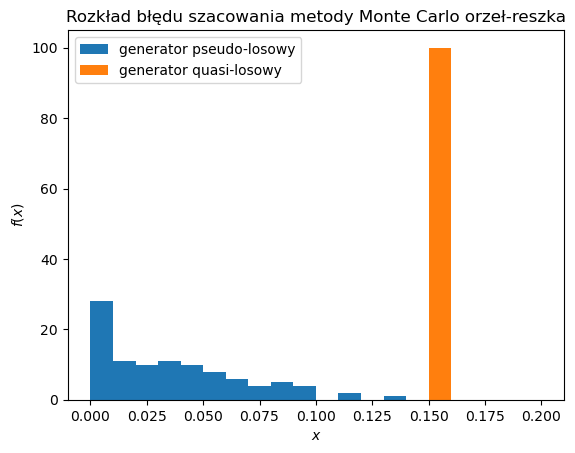

In [18]:
plt.title("Rozkład błędu szacowania metody Monte Carlo orzeł-reszka")
plt.hist(errors, range=(0, 0.2), density=True, bins=20, label="generator pseudo-losowy")
plt.hist(errors_sobol, range=(0, 0.2), density=True, bins=20, label="generator quasi-losowy")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(loc="best")
plt.show()

Błąd dla generatora pseudo-losowego posiada jakiś losowy rozkład o wielu różnych wartościach. Błąd dla generatora quasi-losowego dla danego eksperymentu może przyjąć tylko jedną wartość.

Wynika do z faktu, że generatory quasi-losowe są stworzone w taki sposób, żeby otrzymanie kolejnej liczby zawsze było przewidywalne i w oczywisty sposób deterministyczne. Głównym zdaniem generatora quasi-losowego jest jak najbardziej równomierne pokrycie przedziału $[0,1)$, a nie generowanie liczb trudnych do przewidzenia. Nie ma sensu więc przeprowadzać wielokrotnie tego samego eksperymentu na generatorze quasi-losowym, bo wyniki będą identyczne.